Load acf and calculate taus (temp notebook, will be in the scripts)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import from scripts
import os
os.chdir(os.path.expanduser("D:\\intr_timescales\\isttc\\scripts"))
# os.chdir(os.path.expanduser("C:\\Users\\ipoch\\Documents\\repos\\isttc\\scripts"))
from calculate_tau import fit_single_exp, func_single_exp

### Load data

In [2]:
data_folder = 'E:\\isttc\\results\\allen_mice\\'
acf_folder = data_folder + 'dataset\\cut_30min\\acf_binned\\'

In [25]:
bin_size = 50
acf_file = acf_folder + 'acf_binned_acf_50_20.csv'

acf_cols = ['acf_' + str(i) for i in range(21)]
acf_df = pd.read_csv(acf_file, header=None, names=['specimen_id','session_id','unit_id','area_id'] + acf_cols)

In [26]:
acf_df

,specimen_id,session_id,unit_id,area_id,acf_0,acf_1,acf_2,acf_3,acf_4,acf_5,...,acf_11,acf_12,acf_13,acf_14,acf_15,acf_16,acf_17,acf_18,acf_19,acf_20
0,744912849,766640955,950911624,MB,1.0,0.143022,0.223343,0.209290,0.189455,0.184463,...,0.164684,0.152509,0.155179,0.151403,0.143317,0.139357,0.149616,0.130958,0.142431,0.137882
1,744912849,766640955,950911641,MB,1.0,0.199614,0.288799,0.282684,0.266711,0.258102,...,0.242755,0.240076,0.241255,0.232576,0.240838,0.226970,0.234421,0.229139,0.234876,0.220968
2,744912849,766640955,950911686,MB,1.0,-0.320400,-0.129030,0.118703,-0.013674,-0.035476,...,-0.000265,0.009447,-0.000724,0.000907,0.005389,0.014960,-0.002629,-0.001766,0.014756,0.003070
3,744912849,766640955,950911657,MB,1.0,-0.393755,0.072082,0.036701,-0.013059,0.020486,...,0.002128,0.012224,0.005182,0.003387,0.010748,0.001063,0.005979,0.003851,0.012545,-0.001140
4,744912849,766640955,950911696,MB,1.0,0.536237,0.432557,0.357824,0.306088,0.293106,...,0.191425,0.175521,0.167495,0.161414,0.151834,0.147743,0.148564,0.141471,0.136865,0.131202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18163,827809884,847657808,951190560,VISrl,1.0,0.401921,0.259346,0.195088,0.154674,0.122182,...,0.060239,0.056131,0.044763,0.049557,0.044824,0.040347,0.038117,0.029827,0.030345,0.026343
18164,827809884,847657808,951190571,VISrl,1.0,0.035207,0.006831,-0.002628,0.016290,0.006831,...,-0.002628,-0.002628,-0.002628,-0.002628,-0.002629,-0.002629,0.006830,-0.002629,0.006830,-0.002629
18165,827809884,847657808,951190848,VISrl,1.0,0.082775,0.052503,0.046448,0.034339,0.035853,...,0.017688,0.013147,0.013146,-0.000476,0.008605,0.004064,0.020713,0.007090,-0.000478,0.005576
18166,827809884,847657808,951190594,VISrl,1.0,0.220588,0.167760,0.157943,0.107713,0.094433,...,0.057185,0.052276,0.043614,0.046788,0.030910,0.029753,0.039855,0.021668,0.017625,0.026283


### Calculate taus

In [27]:
acf_df_2d = acf_df[acf_cols].values
print(acf_df_2d.shape)

(18168, 21)


In [28]:
t_axis = np.linspace(0,20,21)
print(t_axis)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]


In [7]:
t = np.linspace(0, len(acf_df_2d[0,:])-1, len(acf_df_2d[0,:])).astype(int)
t

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [11]:
tau_ms_l, fit_r_squared_l = [], []
for i in range(acf_df_2d.shape[0]):
    fit_popt, fit_pcov, tau, fit_r_squared = fit_single_exp(acf_df_2d[i,:], start_idx_=1)
    tau_ms = tau * bin_size
    # print(f'fit_popt {fit_popt}, fit_pcov {fit_pcov}, tau {tau}, tau_ms {tau_ms}, fit_r_squared {fit_r_squared}')
    # print('###########')
    tau_ms_l.append(tau_ms)
    fit_r_squared_l.append(fit_r_squared)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 5000.


In [29]:
acf_df['tau_ms'] = tau_ms_l
acf_df['r_squared'] = fit_r_squared

In [30]:
acf_df.to_pickle(data_folder + 'dataset\\cut_30min\\tau_binned\\tau_acf_binned_acf_50_20.pkl')

In [31]:
acf_df

,specimen_id,session_id,unit_id,area_id,acf_0,acf_1,acf_2,acf_3,acf_4,acf_5,...,acf_13,acf_14,acf_15,acf_16,acf_17,acf_18,acf_19,acf_20,tau_ms,r_squared
0,744912849,766640955,950911624,MB,1.0,0.143022,0.223343,0.209290,0.189455,0.184463,...,0.155179,0.151403,0.143317,0.139357,0.149616,0.130958,0.142431,0.137882,3.864438,0.962568
1,744912849,766640955,950911641,MB,1.0,0.199614,0.288799,0.282684,0.266711,0.258102,...,0.241255,0.232576,0.240838,0.226970,0.234421,0.229139,0.234876,0.220968,3.745150,0.962568
2,744912849,766640955,950911686,MB,1.0,-0.320400,-0.129030,0.118703,-0.013674,-0.035476,...,-0.000724,0.000907,0.005389,0.014960,-0.002629,-0.001766,0.014756,0.003070,34.668211,0.962568
3,744912849,766640955,950911657,MB,1.0,-0.393755,0.072082,0.036701,-0.013059,0.020486,...,0.005182,0.003387,0.010748,0.001063,0.005979,0.003851,0.012545,-0.001140,3.388431,0.962568
4,744912849,766640955,950911696,MB,1.0,0.536237,0.432557,0.357824,0.306088,0.293106,...,0.167495,0.161414,0.151834,0.147743,0.148564,0.141471,0.136865,0.131202,243.395433,0.962568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18163,827809884,847657808,951190560,VISrl,1.0,0.401921,0.259346,0.195088,0.154674,0.122182,...,0.044763,0.049557,0.044824,0.040347,0.038117,0.029827,0.030345,0.026343,134.886464,0.962568
18164,827809884,847657808,951190571,VISrl,1.0,0.035207,0.006831,-0.002628,0.016290,0.006831,...,-0.002628,-0.002628,-0.002629,-0.002629,0.006830,-0.002629,0.006830,-0.002629,22.336240,0.962568
18165,827809884,847657808,951190848,VISrl,1.0,0.082775,0.052503,0.046448,0.034339,0.035853,...,0.013146,-0.000476,0.008605,0.004064,0.020713,0.007090,-0.000478,0.005576,154.863328,0.962568
18166,827809884,847657808,951190594,VISrl,1.0,0.220588,0.167760,0.157943,0.107713,0.094433,...,0.043614,0.046788,0.030910,0.029753,0.039855,0.021668,0.017625,0.026283,218.389266,0.962568


### Test plost

In [33]:
tau_df_hp = acf_df.query('area_id == "CA1" or area_id == "CA2" or area_id == "CA3" or area_id == "DG" or area_id == "SUB"').copy()

acf_df_0_1000 = tau_df_hp.query('tau_ms > 10 and tau_ms <= 1000 and r_squared >= 0.8').copy()
print(len(acf_df_0_1000))

3726


In [35]:
len(acf_df_0_1000['area_id'].unique())

5

C:\Users\ipochino\AppData\Local\Temp\ipykernel_18352\4026494260.py:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(ax=axes, x = 'area_id', y='tau_ms',


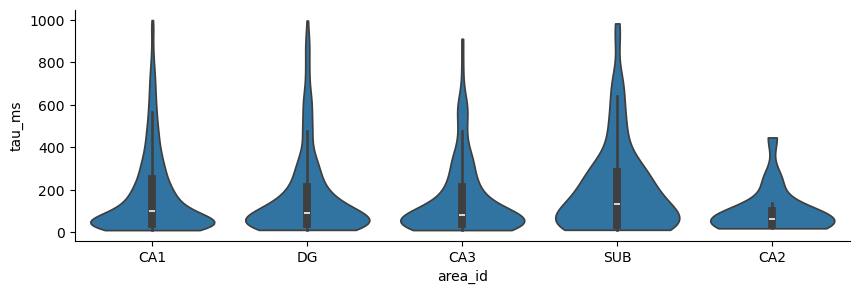

In [36]:
fig, axes = plt.subplots(1,1, figsize=(10,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# sns.stripplot(ax=axes[0], x = 'area_id', y='tau_ms', 
#                order=sttc_df_hp_0_1000_median['area_id'].values,
#                data=sttc_df_hp_0_1000_animal_med, color='white', s=3)
sns.violinplot(ax=axes, x = 'area_id', y='tau_ms', 
               data=acf_df_0_1000, cut=0,  scale='width')
#axes[0].set_title('med animal sttc in HP, 50ms, 20lags, \n allen, n_animals = ' + str(n_animals))

sns.despine()

In [41]:
acf_df_0_1000.groupby(by=['specimen_id','area_id'], as_index=False)['tau_ms'].mean().sort_values(by='tau_ms')

,specimen_id,area_id,tau_ms
15,756578435,CA2,25.336993
33,760960653,CA2,36.014105
28,760946813,CA2,41.358348
6,753795610,SUB,64.667513
37,763236014,CA3,70.644672
...,...,...,...
64,795770036,CA3,313.436949
62,791857608,SUB,392.050688
68,800249587,CA3,411.875116
45,763884103,CA2,446.345554
